In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

In [3]:
train = pd.read_csv('trainset.csv')
test = pd.read_csv('testset.csv')

In [4]:
train.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,41,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,1575,1,999,nonexistent,5191.0,yes
1,49,entrepreneur,married,university.degree,yes,no,telephone,may,mon,1042,1,999,nonexistent,5191.0,yes
2,49,technician,married,basic.9y,no,no,telephone,may,mon,1467,1,999,nonexistent,5191.0,yes
3,41,technician,married,professional.course,yes,no,telephone,may,mon,579,1,999,nonexistent,5191.0,yes
4,45,blue-collar,married,basic.9y,yes,no,telephone,may,mon,461,1,999,nonexistent,5191.0,yes


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29271 entries, 0 to 29270
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          29271 non-null  int64  
 1   job          29271 non-null  object 
 2   marital      29271 non-null  object 
 3   education    29271 non-null  object 
 4   housing      29271 non-null  object 
 5   loan         29271 non-null  object 
 6   contact      29271 non-null  object 
 7   month        29271 non-null  object 
 8   day_of_week  29271 non-null  object 
 9   duration     29271 non-null  int64  
 10  campaign     29271 non-null  int64  
 11  pdays        29271 non-null  int64  
 12  poutcome     29271 non-null  object 
 13  nr.employed  29271 non-null  float64
 14  Subscribed   29271 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.3+ MB


## First Park--data exploration

<Axes: xlabel='age', ylabel='Count'>

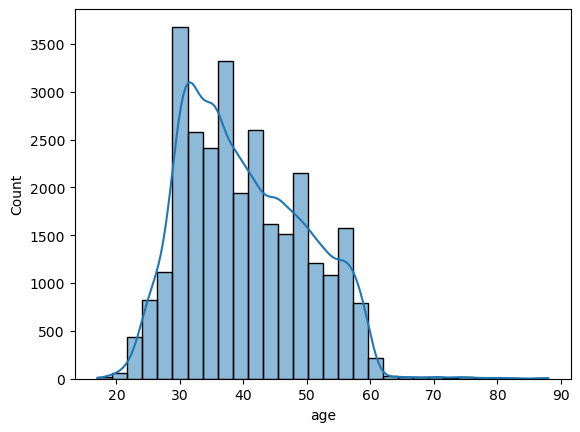

In [6]:
sns.histplot(train['age'], bins=30, kde=True)

<Axes: xlabel='Subscribed', ylabel='count'>

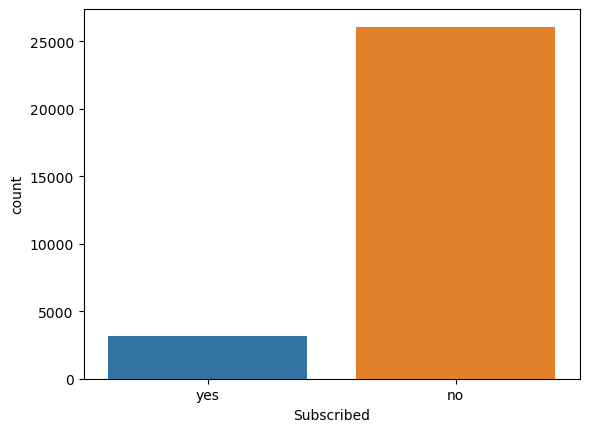

In [7]:
sns.countplot(x='Subscribed', data=train)

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


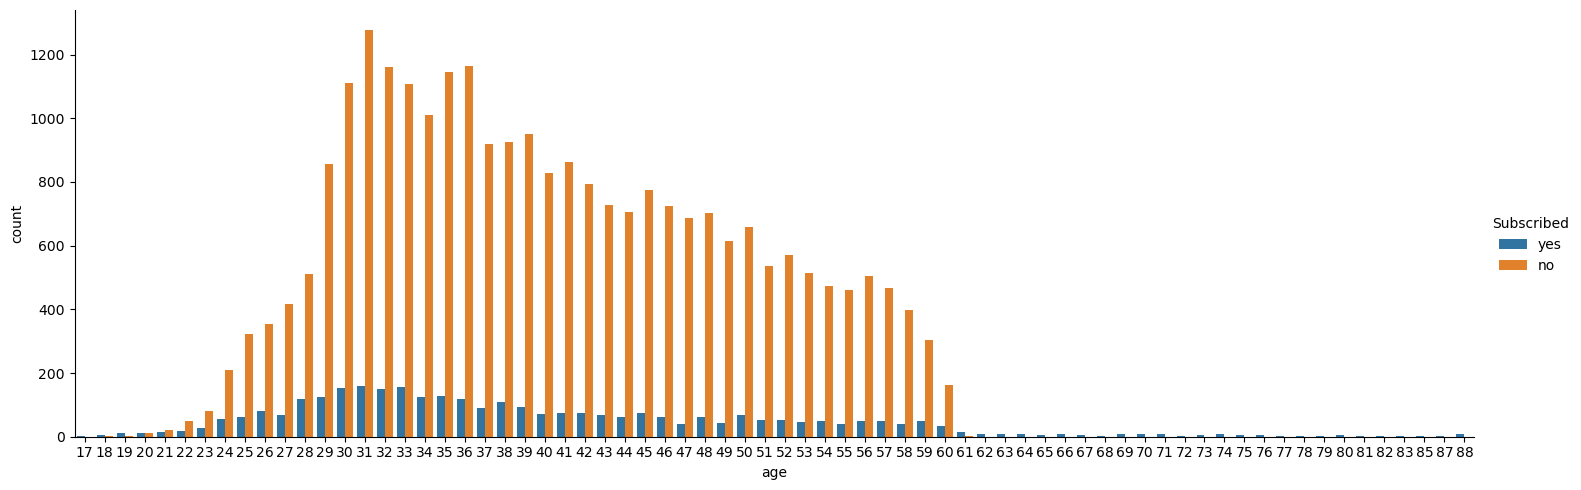

In [8]:
sns.catplot(x='age', data=train, kind='count', hue='Subscribed',height=5, aspect=3)

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


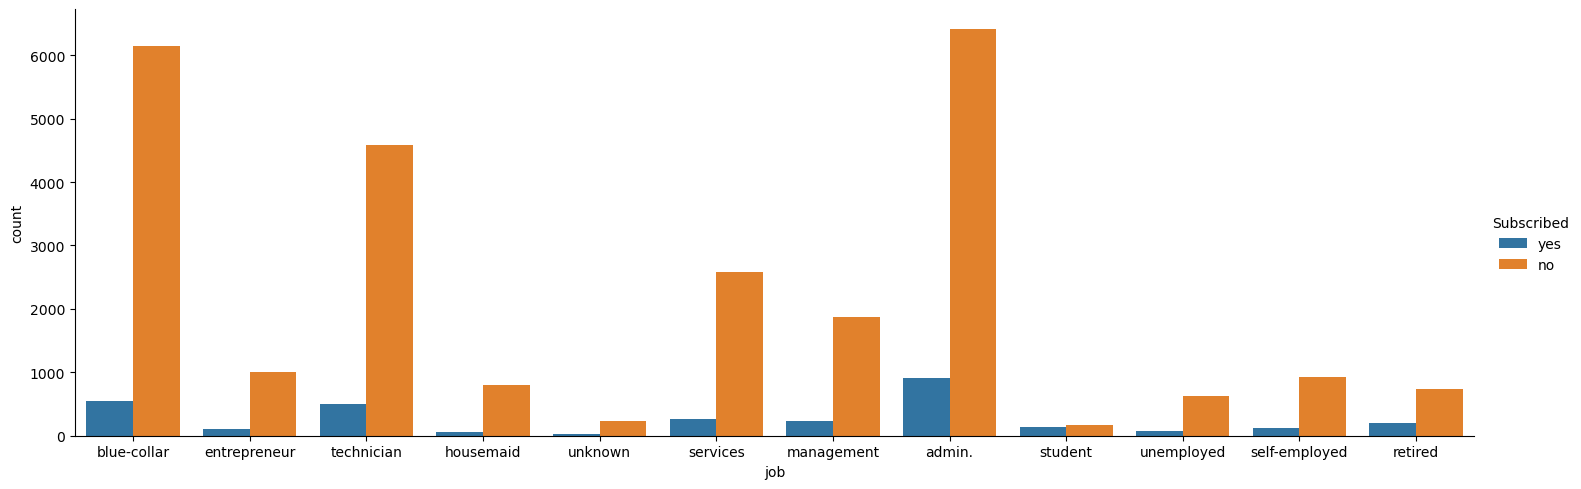

In [9]:
sns.catplot(x='job', data=train, kind='count', hue='Subscribed' ,height=5, aspect=3)

<BarContainer object of 12 artists>

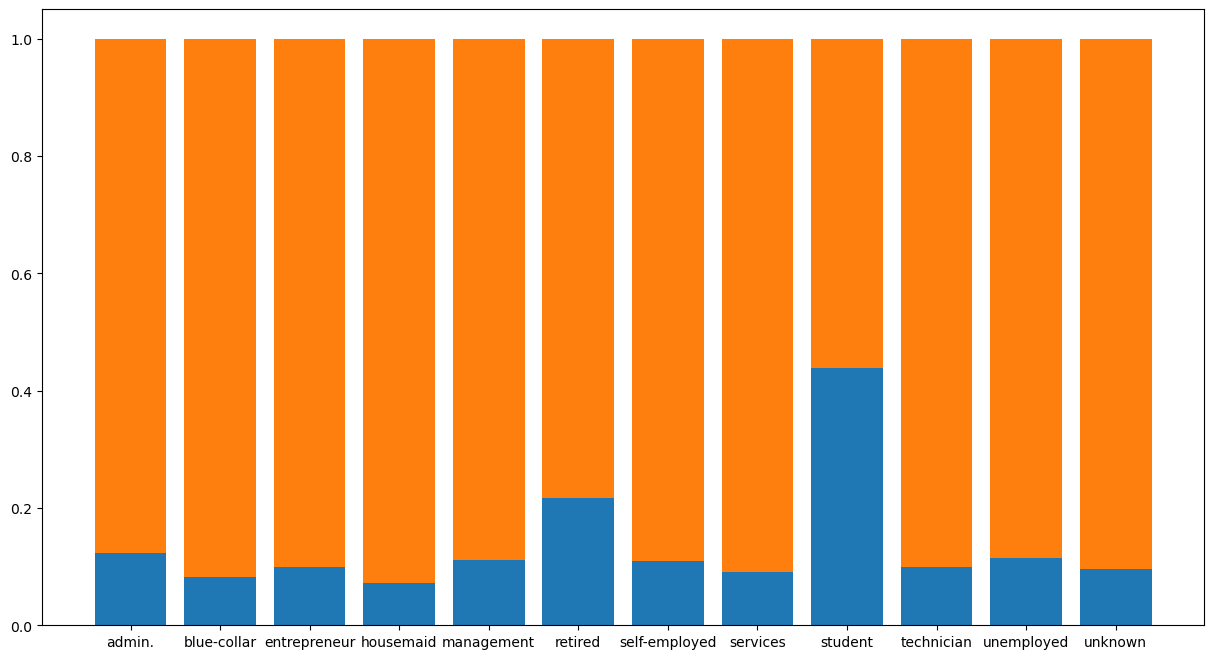

In [10]:
job_counts = train.groupby(['job', 'Subscribed']).size().unstack(fill_value=0)

job_counts['total'] = job_counts['yes'] + job_counts['no']
job_counts['yes_percentage'] = job_counts['yes'] / job_counts['total']
job_counts['no_percentage'] = job_counts['no'] / job_counts['total']

plt.figure(figsize=(15, 8))
plt.bar(job_counts.index, job_counts['yes_percentage'], label='Subscribed')
plt.bar(job_counts.index, job_counts['no_percentage'], bottom=job_counts['yes_percentage'], label='Not Subscribed')

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


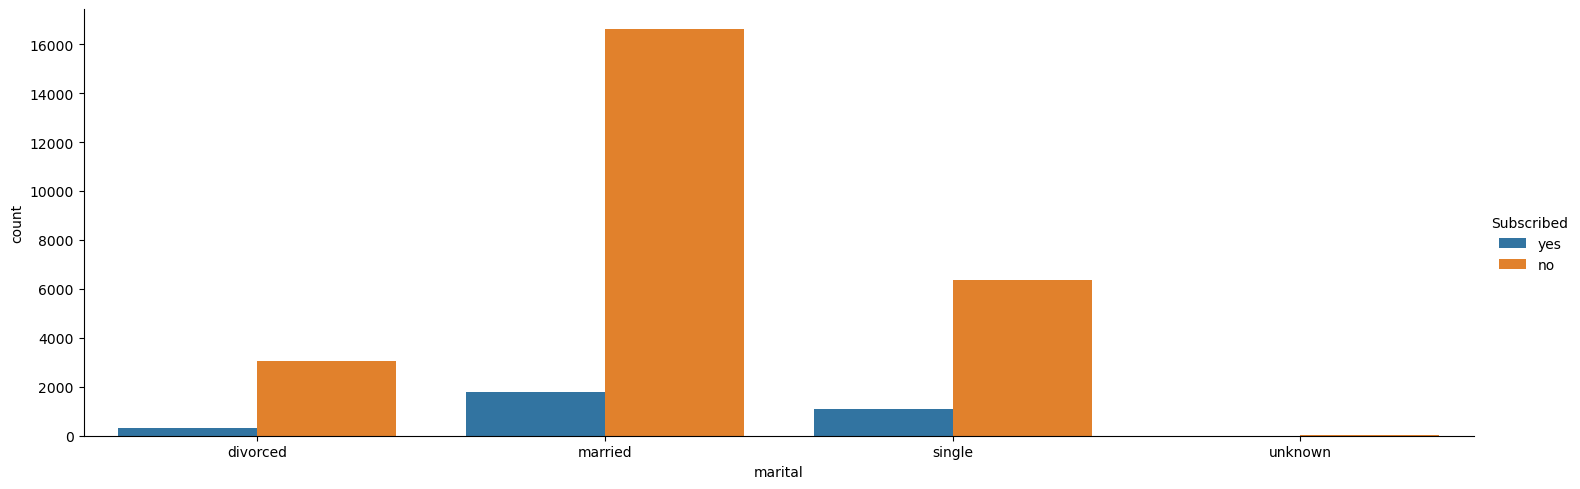

In [11]:
sns.catplot(x='marital', data=train, kind='count', hue='Subscribed' ,height=5, aspect=3)

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


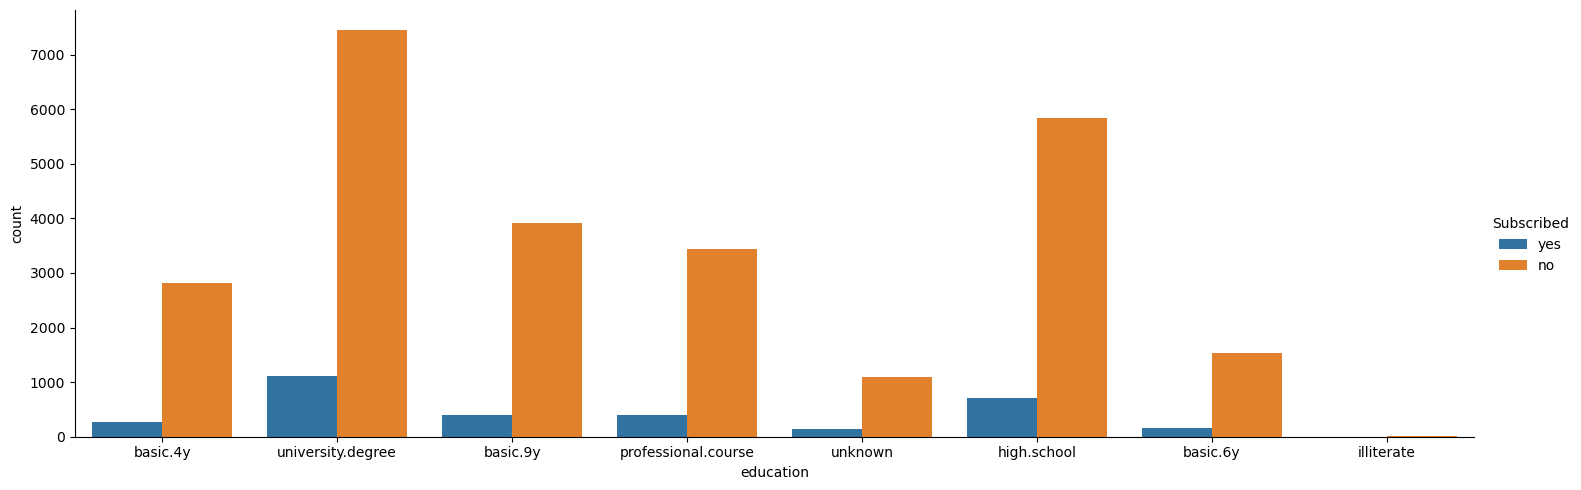

In [12]:
sns.catplot(x='education', data=train, kind='count', hue='Subscribed' ,height=5, aspect=3)

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


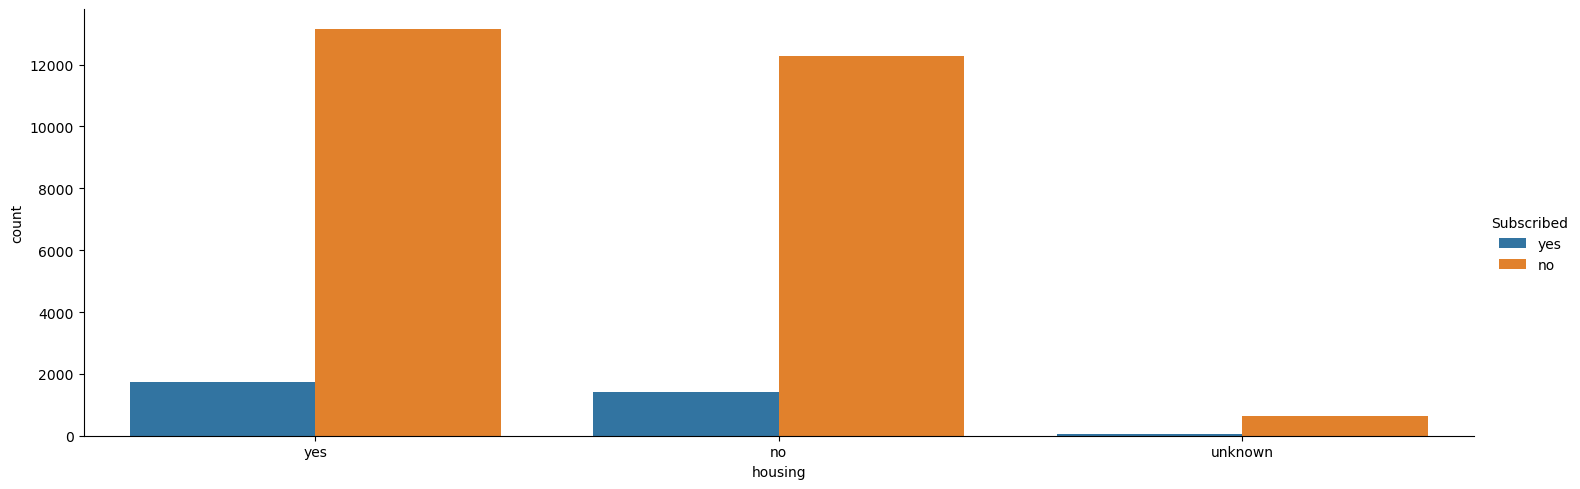

In [13]:
sns.catplot(x='housing', data=train, kind='count', hue='Subscribed' ,height=5, aspect=3)

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


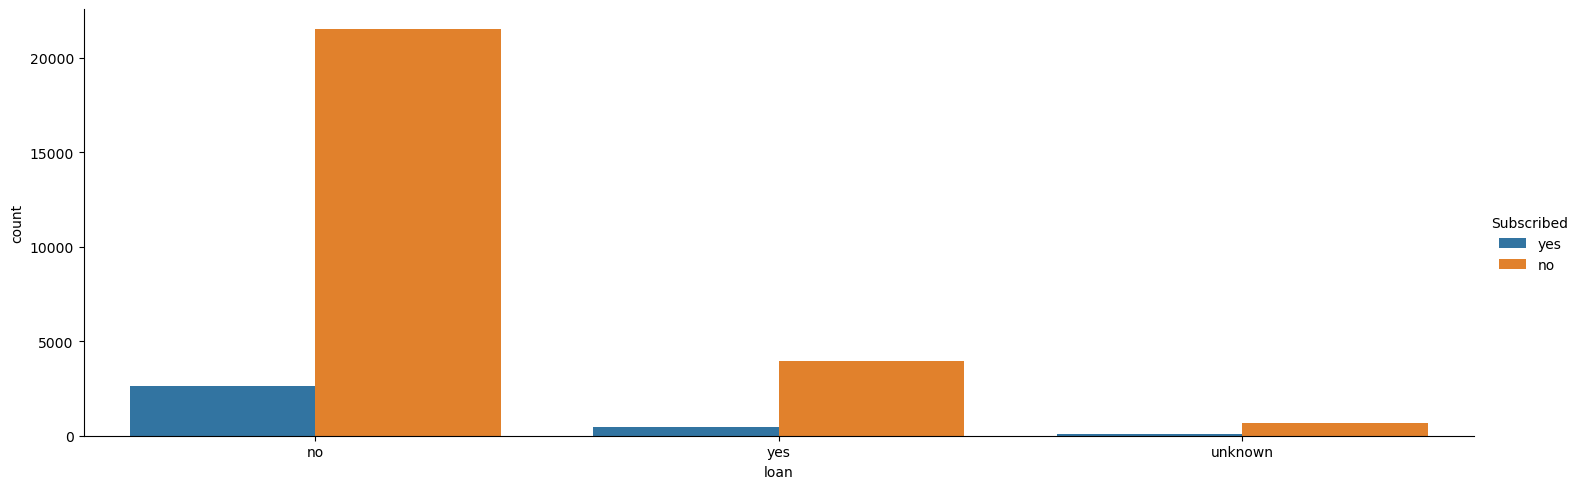

In [14]:
sns.catplot(x='loan', data=train, kind='count', hue='Subscribed' ,height=5, aspect=3)

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


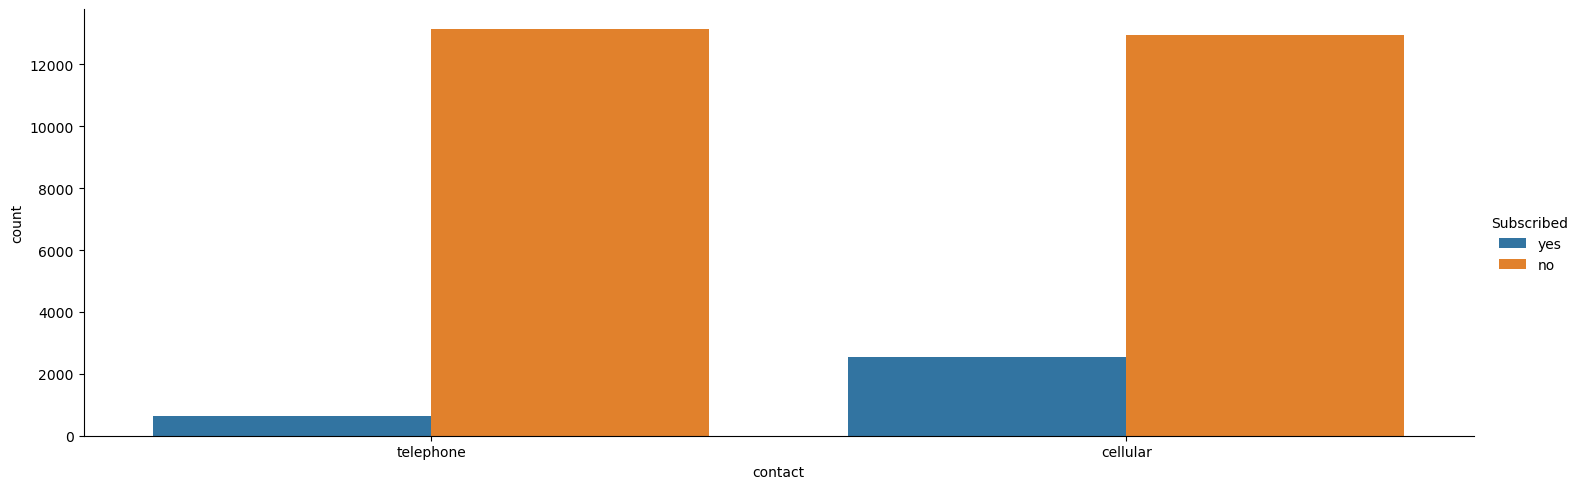

In [15]:
sns.catplot(x='contact', data=train, kind='count', hue='Subscribed' ,height=5, aspect=3)

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


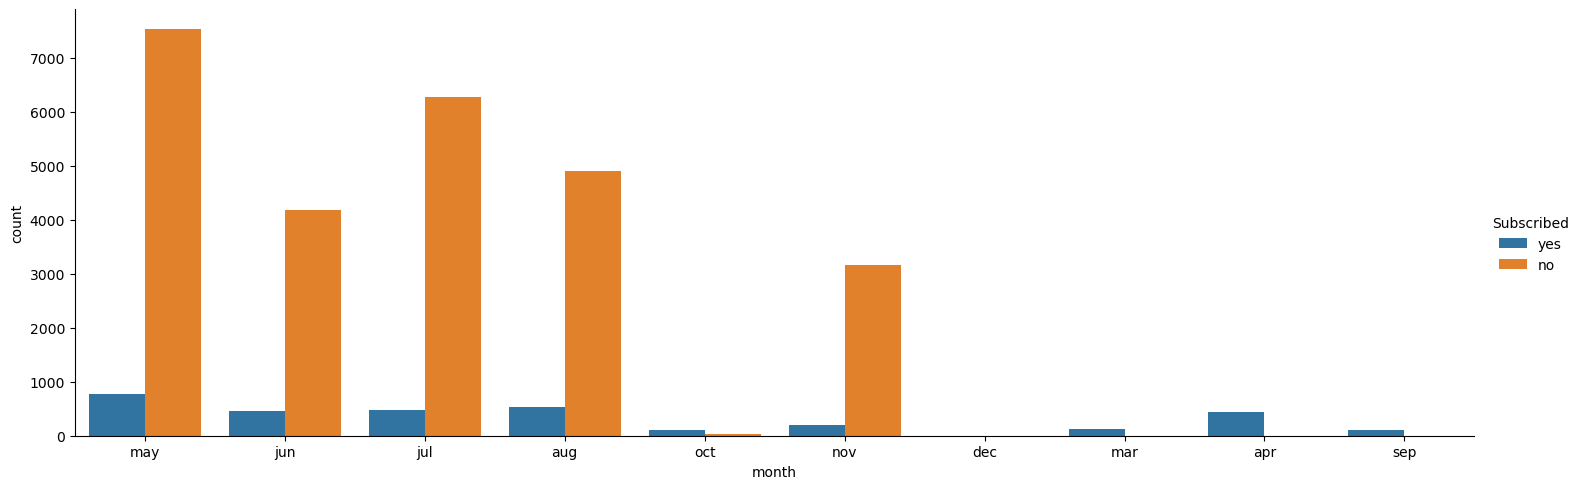

In [16]:
sns.catplot(x='month', data=train, kind='count', hue='Subscribed' ,height=5, aspect=3)

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


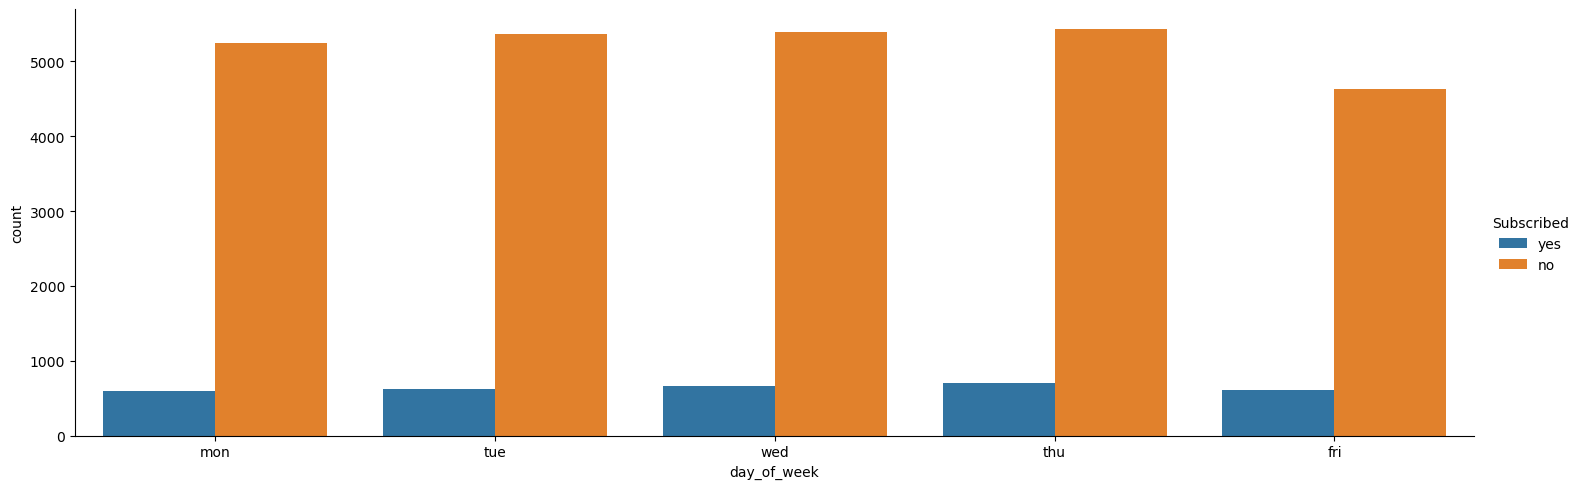

In [17]:
sns.catplot(x='day_of_week', data=train, kind='count', hue='Subscribed' ,height=5, aspect=3)

<Axes: xlabel='duration', ylabel='Count'>

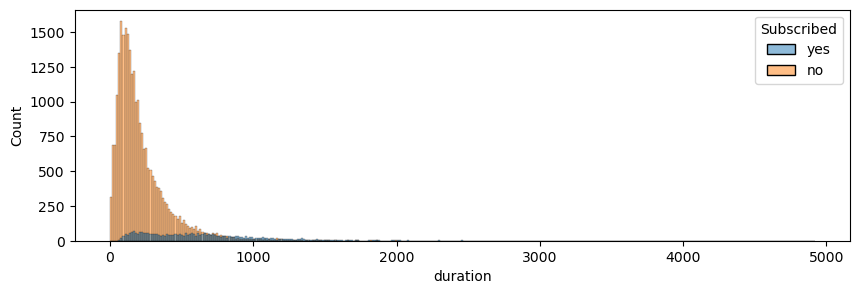

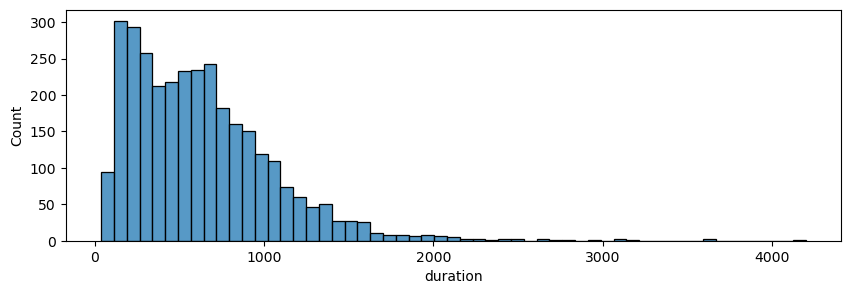

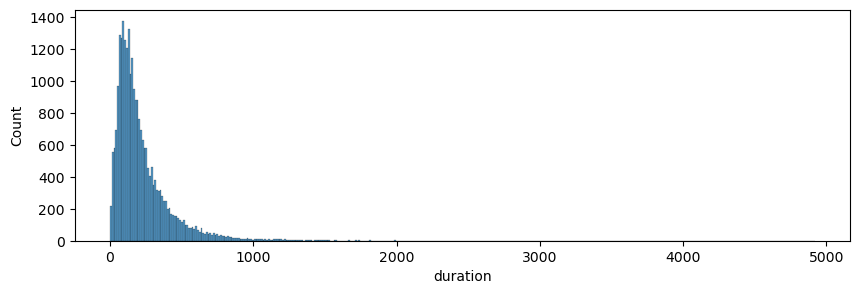

In [18]:
plt.figure(figsize=(10, 3))
sns.histplot(x='duration', data=train, hue='Subscribed')
plt.figure(figsize=(10, 3))
sns.histplot(x='duration', data=train[train['Subscribed'] == 'yes'])
plt.figure(figsize=(10, 3))
sns.histplot(x='duration', data=train[train['Subscribed'] == 'no'])

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


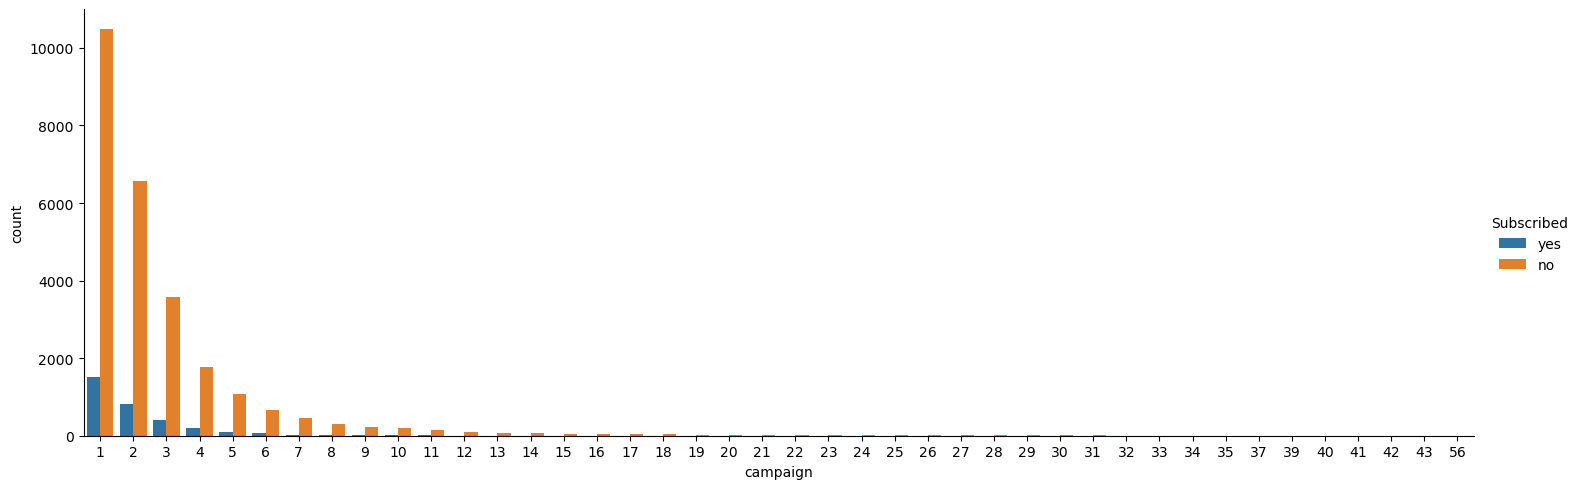

In [19]:
sns.catplot(x='campaign', data=train, kind='count', hue='Subscribed' ,height=5, aspect=3)

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

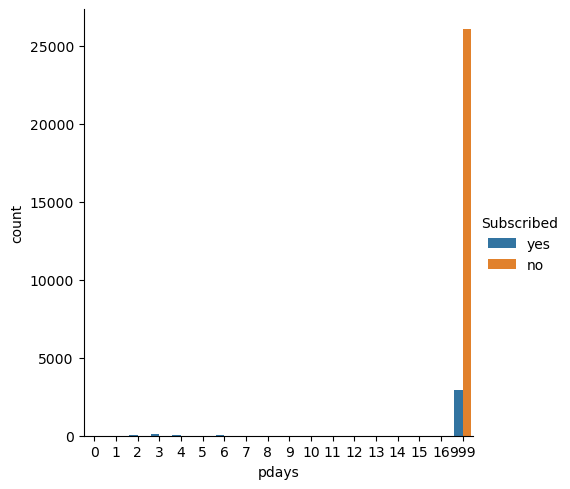

<Figure size 640x480 with 0 Axes>

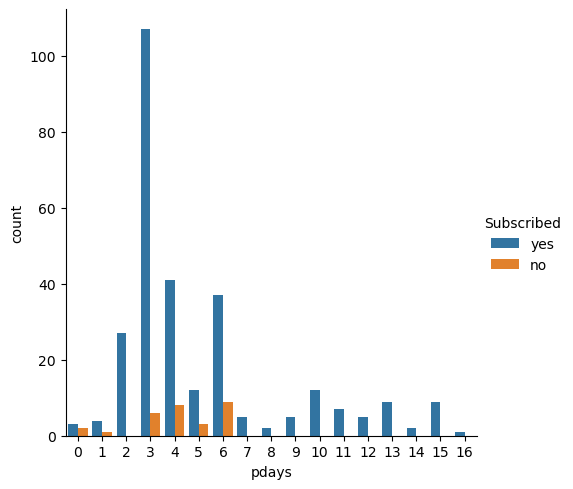

In [20]:
plt.figure()
sns.catplot(x='pdays', data=train, kind='count', hue='Subscribed')
plt.figure()
sns.catplot(x='pdays', data=train[train['pdays']!=999], kind='count', hue='Subscribed')

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

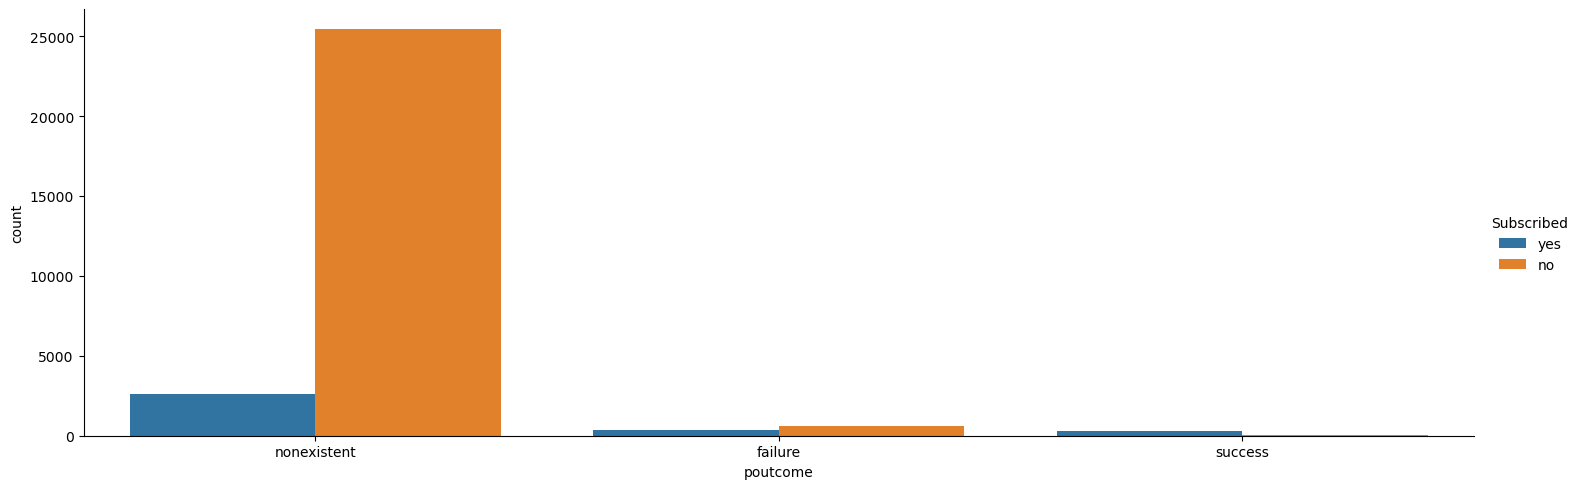

<Figure size 640x480 with 0 Axes>

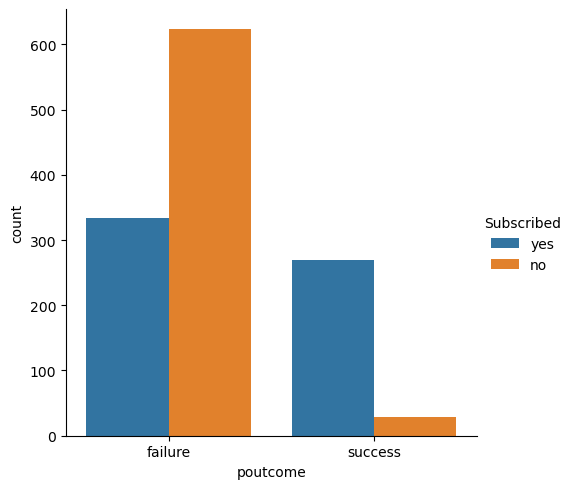

In [21]:
plt.figure()
sns.catplot(x='poutcome', data=train, kind='count', hue='Subscribed' ,height=5, aspect=3)
plt.figure()
sns.catplot(x='poutcome', data=train[train['poutcome']!='nonexistent'], kind='count', hue='Subscribed')

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


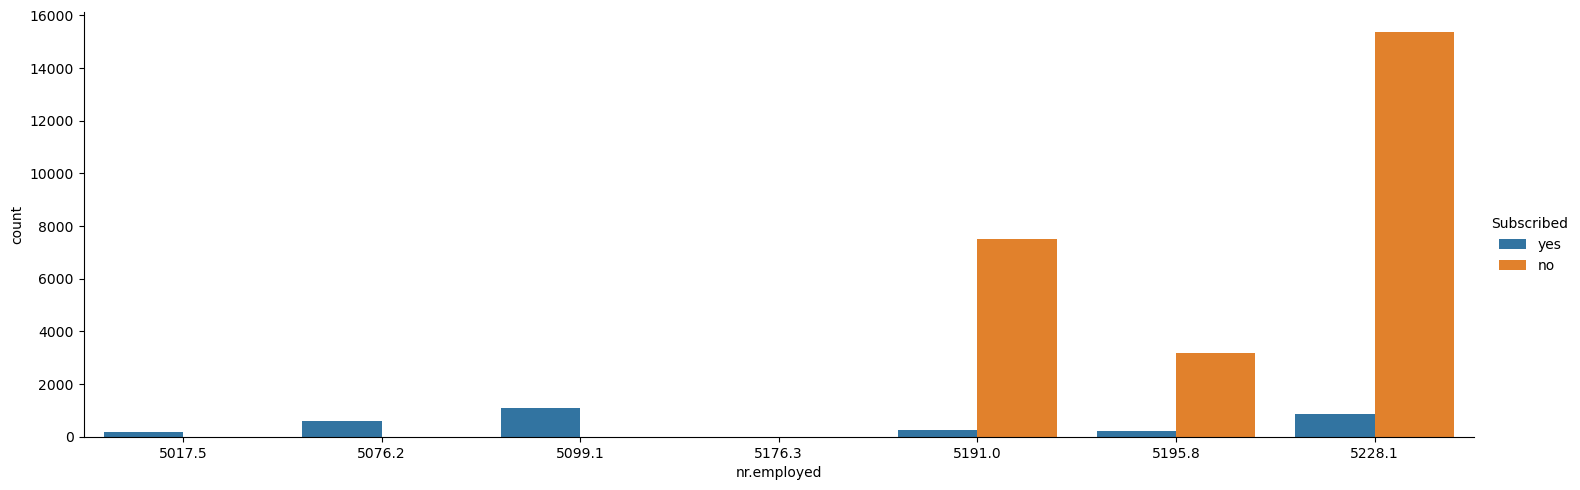

In [22]:
sns.catplot(x='nr.employed', data=train, kind='count', hue='Subscribed' ,height=5, aspect=3)

## Useless--correlation matrix

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

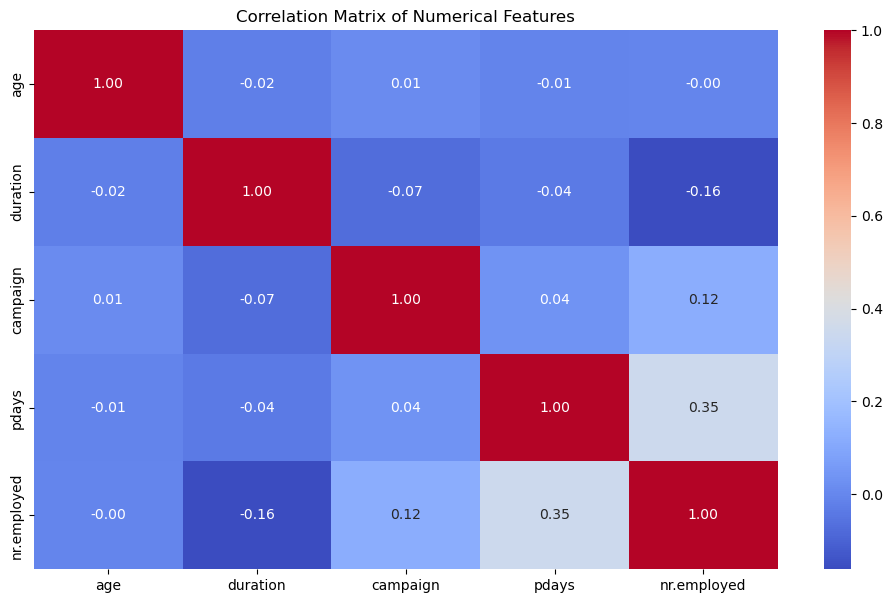

In [23]:
num_features = train.select_dtypes(include=[np.number])
correlation_matrix = num_features.corr()
plt.figure(figsize=(12,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')

Second part--Preprocessing the data

In [24]:
cat_features = train.select_dtypes(include=['object']).columns
train = pd.get_dummies(train, columns=cat_features, drop_first=True)
train.head()

,age,duration,campaign,pdays,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,Subscribed_yes
0,41,1575,1,999,5191.0,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
1,49,1042,1,999,5191.0,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,True
2,49,1467,1,999,5191.0,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
3,41,579,1,999,5191.0,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
4,45,461,1,999,5191.0,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True


In [25]:
cat_features = test.select_dtypes(include=['object']).columns
test = pd.get_dummies(test, columns=cat_features, drop_first=True)
test.head()

,age,duration,campaign,pdays,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,Subscribed_yes
0,62,717,2,999,5017.5,False,False,False,False,True,...,False,True,False,False,False,False,False,True,False,True
1,49,136,2,999,5017.5,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,True
2,36,342,1,999,5017.5,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,70,131,1,999,5017.5,False,False,False,False,True,...,False,True,False,True,False,False,False,True,False,True
4,60,98,1,999,5017.5,False,False,False,False,True,...,False,True,False,True,False,False,False,True,False,True


In [26]:
encoded_correlation_matrix = train.corr()
encoded_correlation_matrix.head()

,age,duration,campaign,pdays,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,Subscribed_yes
age,1.000000,-0.023490,0.011435,-0.010726,-0.004494,-0.006121,0.032266,0.074831,0.069697,0.330203,...,0.009722,0.005534,0.031095,0.028273,-0.022519,0.020874,-0.035778,-0.016280,0.010108,-0.018027
duration,-0.023490,1.000000,-0.074162,-0.038289,-0.161586,0.016979,0.005636,-0.010837,-0.001734,0.007308,...,-0.027933,0.018078,0.018265,-0.013925,0.009560,0.000046,0.012072,-0.042728,0.036902,0.466157
campaign,0.011435,-0.074162,1.000000,0.036038,0.123702,-0.004492,-0.005739,-0.000272,-0.009702,0.007656,...,-0.107976,-0.033111,-0.023259,0.010041,0.015310,-0.026358,-0.022642,0.065149,-0.034966,-0.065121
pdays,-0.010726,-0.038289,0.036038,1.000000,0.351073,0.031841,0.006931,0.006340,-0.005284,-0.023772,...,0.004401,-0.096409,-0.213813,0.006013,-0.017467,-0.002474,0.008622,0.494166,-0.971080,-0.268149
nr.employed,-0.004494,-0.161586,0.123702,0.351073,1.000000,0.034969,-0.006279,0.020884,-0.027022,-0.066930,...,-0.094686,-0.180496,-0.311952,0.026995,0.005442,-0.014664,-0.000746,0.373702,-0.337721,-0.636315


In [27]:
high_corr = np.where(encoded_correlation_matrix.abs() > 0.75)
high_corr_pairs = [(encoded_correlation_matrix.columns[x], encoded_correlation_matrix.columns[y], encoded_correlation_matrix.iloc[x,y])
                  for x, y in zip(*high_corr) if x != y and x < y]
high_corr_pairs

[('pdays', 'poutcome_success', -0.9710796102201944),
 ('marital_married', 'marital_single', -0.7607539807601534),
 ('housing_unknown', 'loan_unknown', 1.0)]

### clean unknown value

In [28]:
train = train[~train.isin(['unknown']).any(axis=1)]
test = test[~test.isin(['unknown']).any(axis=1)]

## Third part-- using classification model and test

In [29]:
X_train = train.drop('Subscribed_yes', axis=1)
y_train = train['Subscribed_yes']

X_test = test.drop('Subscribed_yes', axis=1)
y_test = test['Subscribed_yes']

0.14223378367038683
              precision    recall  f1-score   support

       False       1.00      0.02      0.05     10473
        True       0.12      1.00      0.22      1444

    accuracy                           0.14     11917
   macro avg       0.56      0.51      0.13     11917
weighted avg       0.89      0.14      0.07     11917



<Axes: >

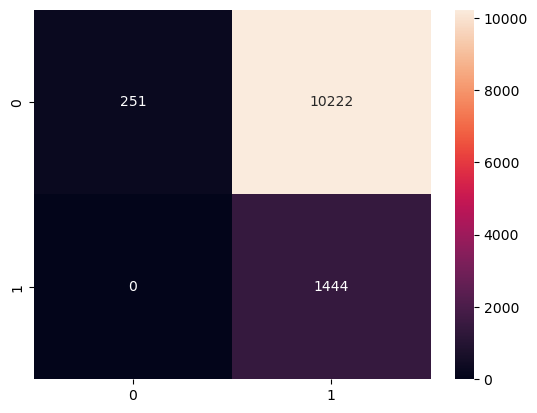

In [31]:
Dtc_model = DecisionTreeClassifier()
Dtc_model.fit(X_train, y_train)
Dtc_prediction = Dtc_model.predict(X_test)

print(accuracy_score(y_test, Dtc_prediction))
print(classification_report(y_test, Dtc_prediction))

cm = confusion_matrix(y_test, Dtc_prediction)
sns.heatmap(cm, annot=True, fmt="d")

0.8795837878660737
              precision    recall  f1-score   support

       False       0.93      0.93      0.93     10473
        True       0.50      0.52      0.51      1444

    accuracy                           0.88     11917
   macro avg       0.72      0.73      0.72     11917
weighted avg       0.88      0.88      0.88     11917



E:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

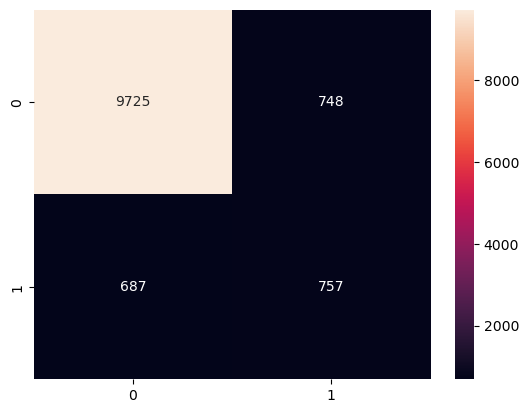

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
log_prediction = logmodel.predict(X_test)

print(accuracy_score(y_test, log_prediction))
print(classification_report(y_test, log_prediction))

cm = confusion_matrix(y_test, log_prediction)
sns.heatmap(cm, annot=True, fmt="d")

Mean Absolute Error:  0.7917191902144544
Mean Squared Error:  0.737641171816545
Root Mean Squared Error:  0.8588603913422396


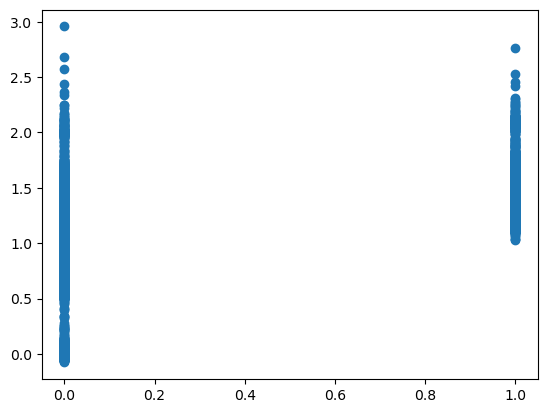

In [41]:
lmodel = LinearRegression()
lmodel.fit(X_train, y_train)
lmodel_prediction = lmodel.predict(X_test)

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, lmodel_prediction))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, lmodel_prediction))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, lmodel_prediction)))

plt.scatter(y_test, lmodel_prediction)

Random Forest Accuracy: 0.14332466224720986
Random Forest Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.03      0.05     10473
        True       0.12      1.00      0.22      1444

    accuracy                           0.14     11917
   macro avg       0.56      0.51      0.13     11917
weighted avg       0.89      0.14      0.07     11917



<Axes: >

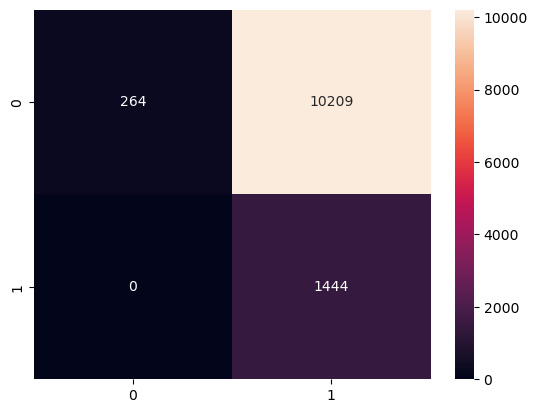

In [34]:
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train, y_train)
rfmodel_prediction = rfmodel.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rfmodel_prediction))
print("Random Forest Classification Report:\n", classification_report(y_test, rfmodel_prediction))

cm = confusion_matrix(y_test, rfmodel_prediction)
sns.heatmap(cm, annot=True, fmt="d")

Gradient Boosting Classifier Accuracy: 0.14307292103717378
Gradient Boosting Classifier Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.02      0.05     10473
        True       0.12      1.00      0.22      1444

    accuracy                           0.14     11917
   macro avg       0.56      0.51      0.13     11917
weighted avg       0.89      0.14      0.07     11917



<Axes: >

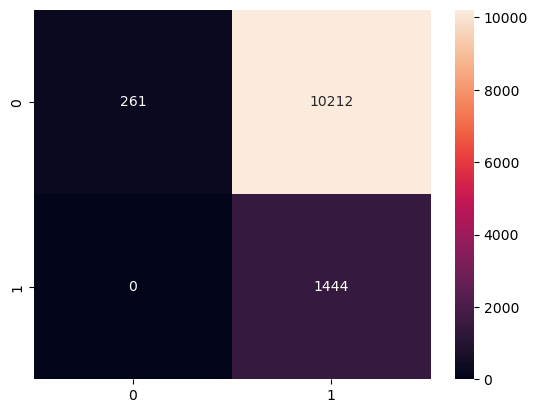

In [35]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)
gbm_model_prediction = gbm_model.predict(X_test)

print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, gbm_model_prediction))
print("Gradient Boosting Classifier Classification Report:\n", classification_report(y_test, gbm_model_prediction))

cm = confusion_matrix(y_test, gbm_model_prediction)
sns.heatmap(cm, annot=True, fmt="d")

Naive Bayes Accuracy: 0.20122514055550894
Naive Bayes Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.09      0.17     10473
        True       0.13      1.00      0.23      1444

    accuracy                           0.20     11917
   macro avg       0.57      0.55      0.20     11917
weighted avg       0.89      0.20      0.17     11917



<Axes: >

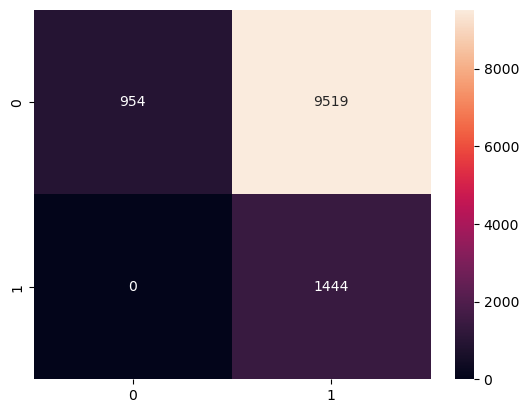

In [36]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

print('Naive Bayes Accuracy:', accuracy_score(y_test, nb_predictions))
print('Naive Bayes Classification Report:\n', classification_report(y_test, nb_predictions))

cm = confusion_matrix(y_test, nb_predictions)
sns.heatmap(cm, annot=True, fmt="d")

AdaBoost Accuracy: 0.14223378367038683
AdaBoost Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.02      0.05     10473
        True       0.12      1.00      0.22      1444

    accuracy                           0.14     11917
   macro avg       0.56      0.51      0.13     11917
weighted avg       0.89      0.14      0.07     11917



<Axes: >

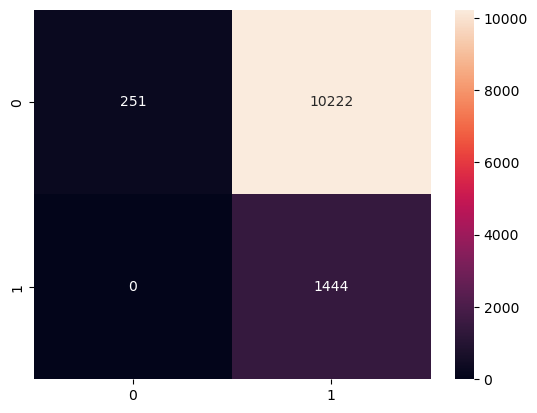

In [37]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_predictions = ada_model.predict(X_test)

print('AdaBoost Accuracy:', accuracy_score(y_test, ada_predictions))
print('AdaBoost Classification Report:\n', classification_report(y_test, ada_predictions))

cm = confusion_matrix(y_test, ada_predictions)
sns.heatmap(cm, annot=True, fmt="d")

SVM Accuracy: 0.6504153729965595
SVM Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.60      0.75     10473
        True       0.26      1.00      0.41      1444

    accuracy                           0.65     11917
   macro avg       0.63      0.80      0.58     11917
weighted avg       0.91      0.65      0.71     11917



<Axes: >

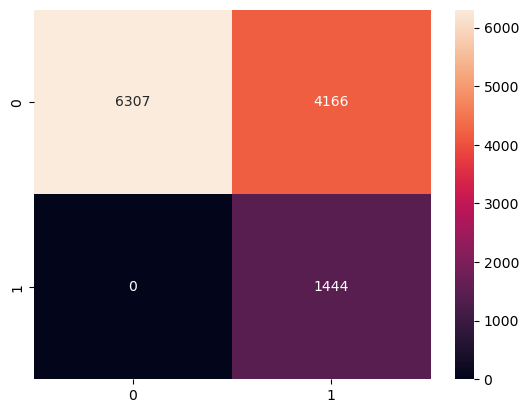

In [38]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

print('SVM Accuracy:', accuracy_score(y_test, svm_predictions))
print('SVM Classification Report:\n', classification_report(y_test, svm_predictions))

cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(cm, annot=True, fmt="d")